In [5]:
%%time
from sklearn import tree
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 2 ms


In [6]:
#https://www.kaggle.com/c/titanic
titanic = pd.read_csv('data/titanic.csv')
#titanic.head(3)

In [7]:
#Поиск пропущенных значений
#titanic.isnull().sum()

In [8]:
#удалим столбцы(axis=1) полей из таблицы
X = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis = 1)

#заменяем строковые данные разбивая их на столбцы
X = pd.get_dummies(X)

#грубо заполняем пропущенные значения
X = X.fillna({'Age':X.Age.median()})

#будем предсказывать выживание
y = titanic.Survived


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [10]:
from sklearn.model_selection import GridSearchCV
clf_opt = tree.DecisionTreeClassifier()
param_opt = {'criterion':['gini','entropy'],
             'max_depth':range(1,30)}

In [11]:
grid_search_cv_clf_opt = GridSearchCV(clf_opt,
                                      param_opt,
                                      cv=5)

In [12]:
grid_search_cv_clf_opt.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [13]:
grid_search_cv_clf_opt.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [14]:
best_clf = grid_search_cv_clf_opt.best_estimator_

In [15]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [16]:
best_clf.score(X_test,y_test)

0.7694915254237288

In [17]:
from sklearn.metrics import precision_score, recall_score
#Предсказаные значения
y_pred = best_clf.predict(X_test)  

In [18]:
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.7407407407407407
0.6666666666666666


1    [0.42857143 0.57142857]


<AxesSubplot:>

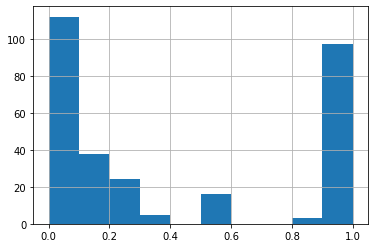

In [19]:
#Вероятность предсказаные значения
y_pred_prob = best_clf.predict_proba(X_test)

print(y_pred[0],'  ',y_pred_prob[0])
#Выжившие
pd.Series(y_pred_prob[:,1]).hist()

In [20]:
import numpy as np
#установим порог 0.8 для выживших
y_pred = np.where(y_pred_prob[:,1] > 0.2,1,0)
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))

0.6827586206896552
0.825


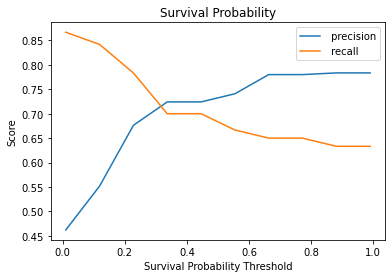

In [30]:
N = 10
pre = np.zeros(N,dtype='float')
rec = np.zeros(N,dtype='float')
prob = np.linspace(0.01,0.99,N)
i = 0

for p in prob:
    y_pred = np.where(y_pred_prob[:,1] > p,1,0)   
    pre[i] = precision_score(y_test,y_pred)
    rec[i] = recall_score(y_test,y_pred)
    i += 1
    
plt.plot(prob,pre,label = ' precision')
plt.plot(prob,rec,label = ' recall')
plt.title('Survival Probability')
plt.ylabel('Score')
plt.xlabel('Survival Probability Threshold')
plt.legend()

plt.show()


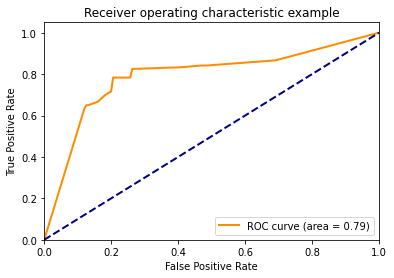

In [29]:
# ROC Кривая
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
roc_auc= auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()